In [73]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# import dataset
df = pd.read_csv('faithful.csv')
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [104]:
# check null values
df.isnull().sum()

eruptions    0
waiting      0
dtype: int64

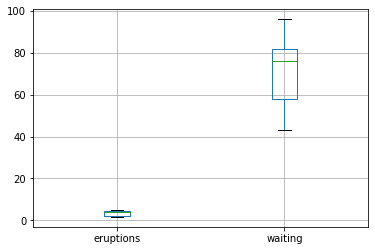

In [107]:
# check outliers by boxplot
df.boxplot()
plt.show()

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


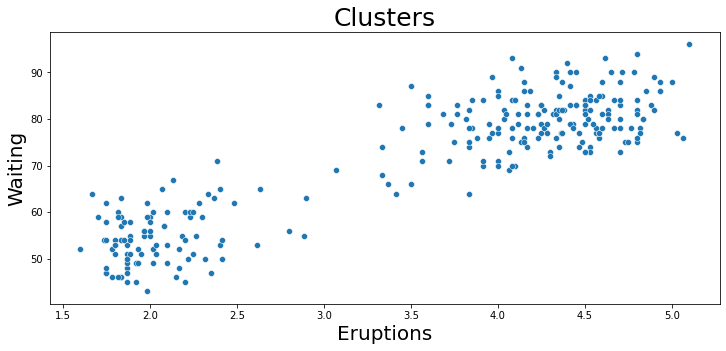

In [88]:
# check clusters
plt.figure(figsize = (12,5))
plt.title('Clusters',fontsize = 25)
plt.xlabel('Eruptions', fontsize = 20)
plt.ylabel('Waiting', fontsize = 20)
sns.scatterplot(df.eruptions,df.waiting)
plt.show()

In [76]:
# import stanterd scaller to scale our data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [77]:
# scalled data
scalled_data = std.fit_transform(df)

In [80]:
# import kmeans cluster
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=2)

In [83]:
# fit data on model and find final centeroid
kmc.fit(scalled_data)
centeroid = kmc.cluster_centers_
centeroid

array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]])

In [84]:
# check in which cluster the data point come
kmc.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1])

In [89]:
# check inertia value
kmc.inertia_

79.57595948827698

# K Values & Inertia

In [93]:
# different inertia with different k values
inertias = []
k_values = range(1,10)
for i in k_values:
    kmc = KMeans(n_clusters=i)
    kmc.fit(scalled_data)
    inertias.append(kmc.inertia_)
print(inertias)

C:\Users\mridh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[544.0000000000001, 79.57595948827698, 56.313617740362616, 43.87095928963708, 34.27437919945956, 27.352597692312106, 23.840163551759755, 20.786051603839752, 18.611166444829024]


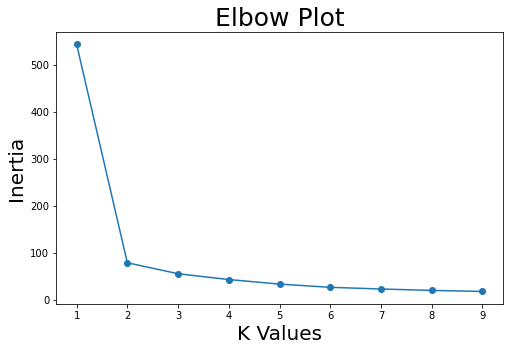

In [103]:
# see elbow curve with line plot
plt.figure(figsize = (8,5))
plt.title('Elbow Plot',fontsize = 25)
plt.xlabel('K Values', fontsize = 20)
plt.ylabel('Inertia', fontsize = 20)
plt.plot(k_values,inertias,'-o')
plt.show()